In [1]:
#3/7/24 Neural Net for model creation using Combined Mutagen Chemopy Data with K-Fold
#Suppress unneeded low level warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import math
import sys
sys.path.insert(1, '/Users/james/Documents/Honours/Python')
from Function_Repo import metriccalc
from Function_Repo import nnmetrics
#Data import
#targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/structdata/Mutagen/mutagenMorganfp.csv')
seed = 81
datasets = []
index = []
directory = '/Users/james/Documents/Honours/Data/structdata/endocrine_redux/Chemopy/SR-ATAD5/'
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        df.drop(columns=['SMILES'], inplace=True)
        
        #drops 90% of negative columns to resolve class imbalance
        ytrain = df.iloc[:, 0].values
        reps = 0
        todrop = []
        for item in ytrain:
            if reps % 10 != 0 and item == 0:
                todrop.append(reps)
            reps = reps + 1

        df = df.drop(todrop)
        df = df.dropna(axis=1)
        datasets.append(df)
        index.append(file)

targetdata = datasets[0]
for item in datasets[1:]:
    targetdata = pd.concat([targetdata, item.iloc[:,2:]], axis=1)

targetdata = targetdata.dropna()

#Splitting data into 5 folds 
dfarray = targetdata.to_numpy()
#First set aside 20% of the data for a final validation at the end
dfarray, tempset = train_test_split(dfarray, test_size=0.2, random_state=seed)

size = len(dfarray) / 5
splitsize = math.ceil(size)
empty = [[] for _ in range(5)]
splits = []
for list in empty:
    splits.append(list)

loops = 0
currsplit = 0
#Results in a list of 5 lists that each contain 1/5 of the targetdata
for row in dfarray:
    splits[currsplit].append(row)
    if loops == splitsize:
        loops = 0
        currsplit = currsplit + 1
    loops = loops + 1

folds = []
for split in splits:
    temp = pd.DataFrame(split)
    folds.append(temp)

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 171, 1)]          0         
                                                                 
 flatten (Flatten)           (None, 171)               0         
                                                                 
 dense (Dense)               (None, 45)                7740      
                                                                 
 dense_1 (Dense)             (None, 1)                 46        
                                                                 
Total params: 7,786
Trainable params: 7,786
Non-trainable params: 0
_________________________________________________________________
3/3 [==============================] - 0s 656us/step


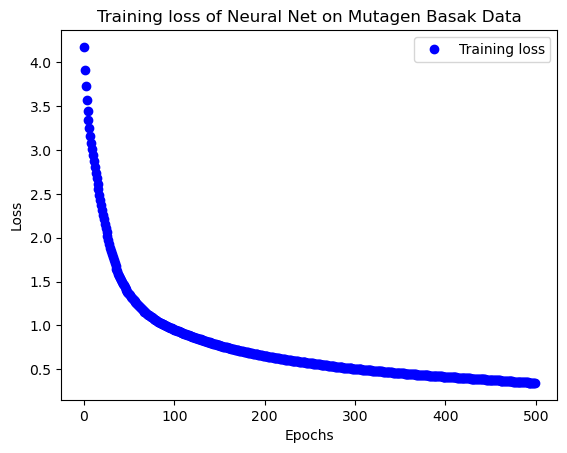

optimal mcc of 0.5413346218007434 at a threshold of 0.23


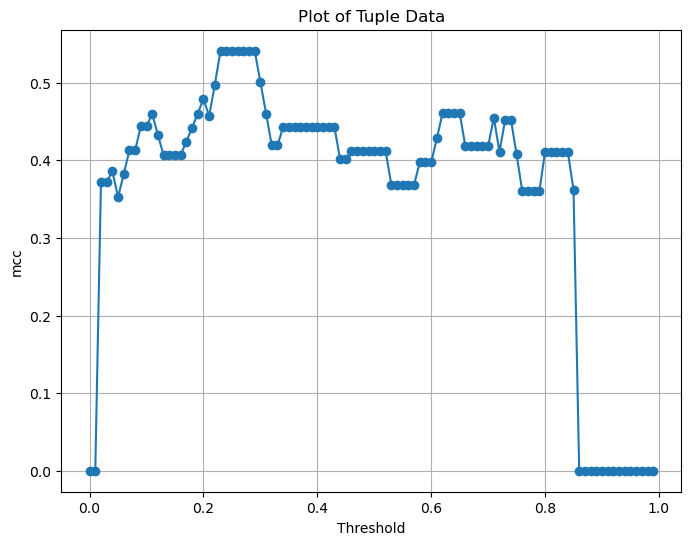

3/3 [==============================] - 0s 589us/step
for model 1 validation metrics of:
positives in data 16
negatives in data 58 

fn count = 8
tn count = 37
tp count = 8
fp count = 21 

net accuracy = 0.6081081081081081
positive accuracy = 0.5
negative accuracy = 0.6379310344827587 

fpr = 0.3620689655172414
tpr = 0.5 

f1 score = 0.35555555555555557
mcc = 0.11631366106366453
cohen Kappa = 0.10657785179017486


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 171, 1)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 171)               0         
                                                                 
 dense_2 (Dense)             (None, 45)                7740      
                                                                 
 dense_3 (Dense)             (None, 1)                 46        
                                                                 
Total params: 7,786
Trainable params: 7,786
Non-trainable params: 0
_________________________________________________________________
3/3 [==============================] - 0s 679us/step


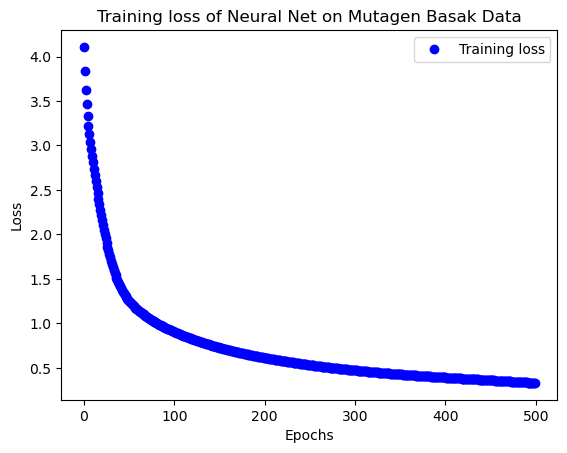

optimal mcc of 0.3280399256759237 at a threshold of 0.09


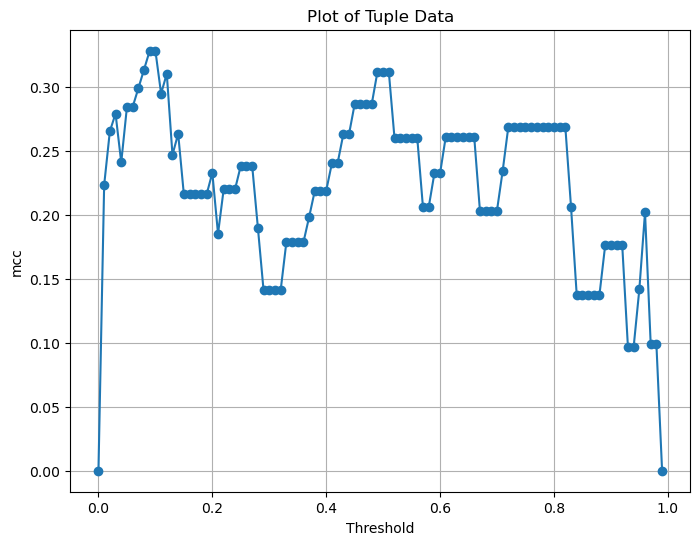

3/3 [==============================] - 0s 575us/step
for model 2 validation metrics of:
positives in data 28
negatives in data 46 

fn count = 3
tn count = 23
tp count = 25
fp count = 23 

net accuracy = 0.6486486486486487
positive accuracy = 0.8928571428571429
negative accuracy = 0.5 

fpr = 0.5
tpr = 0.8928571428571429 

f1 score = 0.6578947368421053
mcc = 0.39910327599310047
cohen Kappa = 0.3446866485013624


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 171, 1)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 171)               0         
                                                                 
 dense_4 (Dense)             (None, 45)                7740      
                                                                 
 dense_5 (Dense)             (None, 1)                 46        
                                                                 
Total params: 7,786
Trainable params: 7,786
Non-trainable params: 0
_________________________________________________________________
3/3 [==============================] - 0s 626us/step


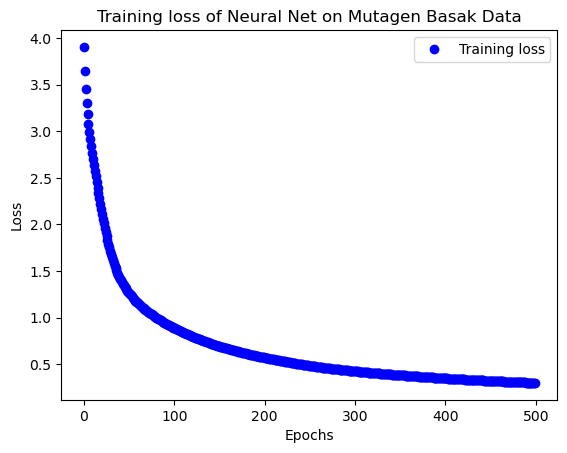

optimal mcc of 0.49354675492575356 at a threshold of 0.1


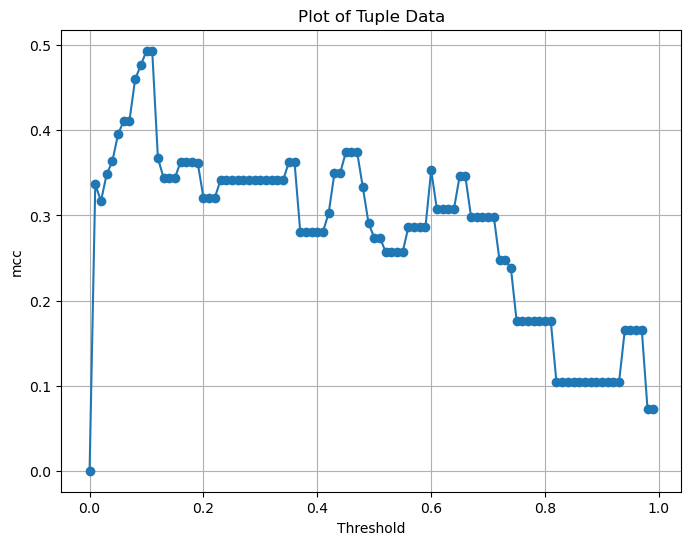

3/3 [==============================] - 0s 561us/step
for model 3 validation metrics of:
positives in data 18
negatives in data 56 

fn count = 4
tn count = 29
tp count = 14
fp count = 27 

net accuracy = 0.581081081081081
positive accuracy = 0.7777777777777778
negative accuracy = 0.5178571428571429 

fpr = 0.48214285714285715
tpr = 0.7777777777777778 

f1 score = 0.4745762711864407
mcc = 0.25517439850141516
cohen Kappa = 0.20622837370242214


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 171, 1)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 171)               0         
                                                                 
 dense_6 (Dense)             (None, 45)                7740      
                                                                 
 dense_7 (Dense)             (None, 1)                 46        
                                                                 
Total params: 7,786
Trainable params: 7,786
Non-trainable params: 0
_________________________________________________________________
3/3 [==============================] - 0s 576us/step


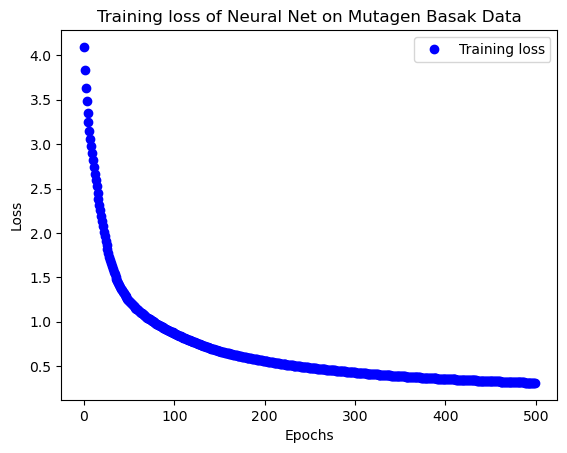

optimal mcc of 0.2518221678550714 at a threshold of 0.59


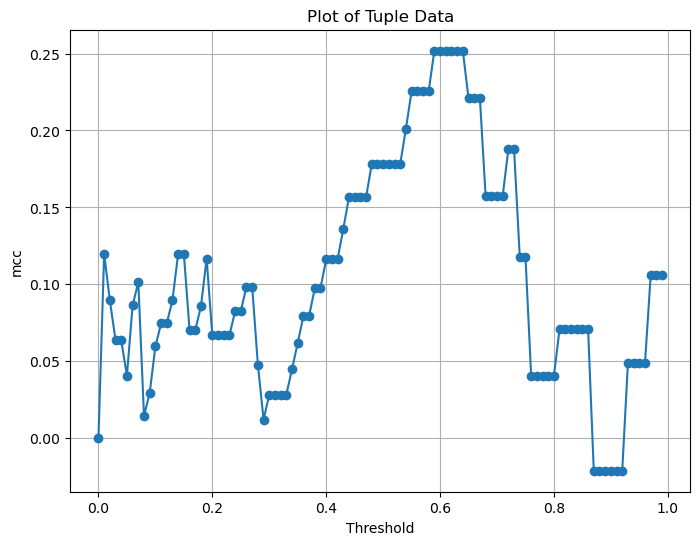

3/3 [==============================] - 0s 561us/step
for model 4 validation metrics of:
positives in data 20
negatives in data 54 

fn count = 11
tn count = 50
tp count = 9
fp count = 4 

net accuracy = 0.7972972972972973
positive accuracy = 0.45
negative accuracy = 0.9259259259259259 

fpr = 0.07407407407407407
tpr = 0.45 

f1 score = 0.5454545454545454
mcc = 0.43871002859269204
cohen Kappa = 0.42247658688865763


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 171, 1)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 171)               0         
                                                                 
 dense_8 (Dense)             (None, 45)                7740      
                                                                 
 dense_9 (Dense)             (None, 1)                 46        
                                                                 
Total params: 7,786
Trainable params: 7,786
Non-trainable params: 0
_________________________________________________________________
3/3 [==============================] - 0s 571us/step


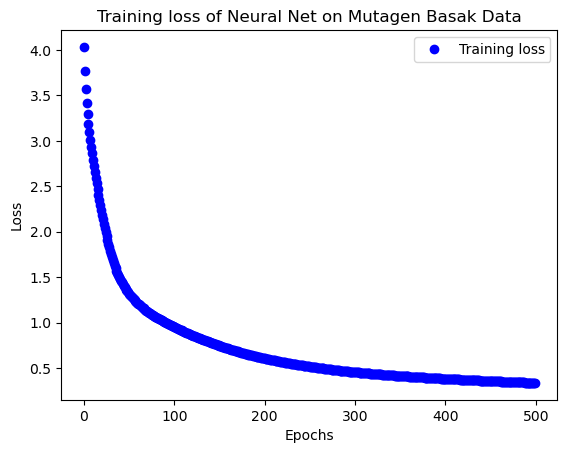

optimal mcc of 0.5234502727598906 at a threshold of 0.1


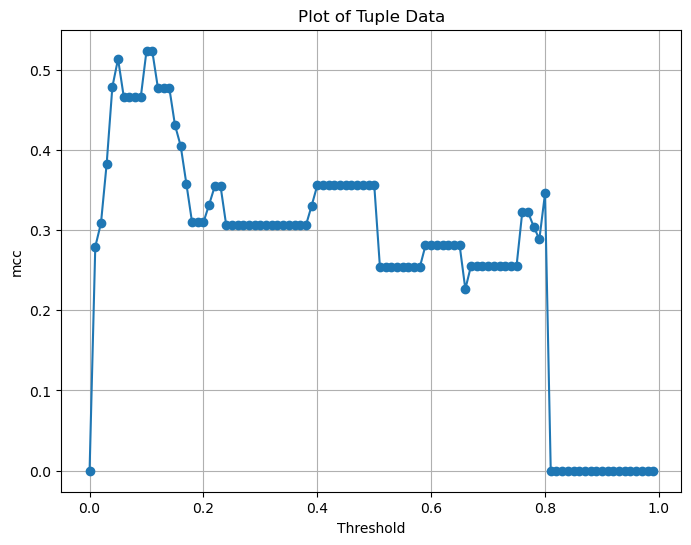

3/3 [==============================] - 0s 550us/step
for model 5 validation metrics of:
positives in data 25
negatives in data 46 

fn count = 4
tn count = 31
tp count = 21
fp count = 15 

net accuracy = 0.7323943661971831
positive accuracy = 0.84
negative accuracy = 0.6739130434782609 

fpr = 0.32608695652173914
tpr = 0.84 

f1 score = 0.6885245901639344
mcc = 0.4909681144850384
cohen Kappa = 0.4670090873172659


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
model_list = []
validlist = []
threshlist = []
testdat = []
#For loop that uses each fold once for valid/testing and the rest for training
#Each 'split' in the range corresponds to the set used for test/validation with the other 4 for training
iteration = 1
for split in range(0,5):
    #Set creation
    trainlist = [df for i, df in enumerate(folds) if i != split]
    trainset = pd.concat(trainlist, axis=0)
    #Splits test set into a test and validation set
    testset, validset = train_test_split(folds[split], test_size=0.5, random_state=seed)
    
    ytrain = trainset[0].values
    xtrain = trainset.iloc[:, 1:]
    
    ytest = testset[0].values
    xtest = testset.iloc[:, 1:]
    
    yvalid = validset[0].values
    xvalid = validset.iloc[:, 1:]
    

    # Determines layer size and input/output
    # Here it turns the 334 one hot encoded features to 42
    keras.utils.set_random_seed(seed)
    tf.config.experimental.enable_op_determinism()
    
    length = len(xtrain.columns)
    temp = length
    # Encoder Creation
    enc_in = keras.Input(shape=(length, 1))
    x = keras.layers.Flatten()(enc_in)

    # Additional encoder layers
    #x = keras.layers.Dense(90, activation="relu")(x)
    x = keras.layers.Dense(45, activation="relu")(x)
    #x = keras.layers.Dense(10, activation="relu")(x)

    enc_out = keras.layers.Dense(1, activation="sigmoid")(x)
    autoencoder = keras.Model(enc_in, enc_out, name='autoencoder')
    # Optimiser
    optimise = tf.keras.optimizers.Adam(learning_rate=0.00001)
    
    autoencoder.compile(optimise, loss='binary_crossentropy')
    autoencoder.summary()
    
    #Runs and creates the autoencoder and outputs parameters to a specs file
    ytrain = np.array(ytrain)
    epochs = 500
    batchsize = 16
    losshistory = []

    minloss = 1
    bestepoch = 0
    for epoch in range(epochs):
        verb = 1
        if epoch % 50 != 0:
            verb = 0
        logs = autoencoder.fit(
        xtrain,
        ytrain,
        verbose = verb,
        epochs=1,
        batch_size=batchsize),
        validation_split=0.2,

        #autoencoder.save(str(f"models/AE-{epoch+1}.keras"))
        loss = logs[0].history['loss'][0]
        losshistory.append(loss)
        if loss < minloss:
            minloss = loss
            bestepoch = epoch

    #autoencoder.save(str(f"test/AE-{epoch+1}.keras"))
    model_list.append(autoencoder)
    
    preds = autoencoder.predict(xtest)
    
    epochcount = range(epochs)
    plt.figure()
    plt.plot(epochcount, losshistory, 'bo', label='Training loss')
    plt.title('Training loss of Neural Net on Mutagen Basak Data')
    plt.legend()

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    
    #acc curve creation
    acclist = []
    thresholdlist = []
    maxval = 0
    bestthresh = 0
    for threshold in np.arange(0, 1, 0.01):
        newval = nnmetrics(preds, ytest, threshold)[12]
        acclist.append(newval)
        thresholdlist.append(threshold)
        if newval > maxval:
            maxval = newval
            bestthresh = threshold
    threshlist.append(bestthresh)

    import matplotlib.pyplot as plt
    y_values = acclist
    x_values = thresholdlist

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, marker='o', linestyle='-')

    print('optimal mcc of', maxval, 'at a threshold of', bestthresh)
    testdat.append(maxval)

    # Add titles and labels
    plt.title('Plot of Tuple Data')
    plt.ylabel('mcc')
    plt.xlabel('Threshold')

    # Display the plot
    plt.grid(True)
    plt.show()
    
    
    #check models onto validation set, printing various metrics
    preds = autoencoder.predict(xvalid)
    results = nnmetrics(preds, yvalid, bestthresh)
    validlist.append(results)
    print('for model', iteration, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13])
    iteration = iteration + 1

In [13]:
y = tempset[:, 0]
x = tempset[:, 1:]
iter = 1
loops =0
validdat = []
for model in model_list:
    predictions = []
    preds = model.predict(x)
    predictions.append(preds)
    
    results = nnmetrics(preds, y, threshlist[loops])
    validdat.append(results[12])
    print('model', iter, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13], '\n')
    iter = iter + 1
    
    loops = loops + 1

6/6 [==============================] - 0s 729us/step
model 1 validation metrics of:
positives in data 50
negatives in data 133 

fn count = 16
tn count = 84
tp count = 34
fp count = 49 

net accuracy = 0.644808743169399
positive accuracy = 0.68
negative accuracy = 0.631578947368421 

fpr = 0.3684210526315789
tpr = 0.68 

f1 score = 0.5112781954887218
mcc = 0.2788944566416946
cohen Kappa = 0.2583702225824553 

6/6 [==============================] - 0s 412us/step
model 2 validation metrics of:
positives in data 50
negatives in data 133 

fn count = 11
tn count = 66
tp count = 39
fp count = 67 

net accuracy = 0.5737704918032787
positive accuracy = 0.78
negative accuracy = 0.49624060150375937 

fpr = 0.5037593984962406
tpr = 0.78 

f1 score = 0.5
mcc = 0.24934464087710914
cohen Kappa = 0.20470247381323825 

6/6 [==============================] - 0s 416us/step
model 3 validation metrics of:
positives in data 50
negatives in data 133 

fn count = 11
tn count = 68
tp count = 39
fp count = 65

In [6]:
#get x and y values for the final validation set
import statistics

toxvals = []
fingerprints = []
for row in tempset:
    toxvals.append(row[0])
    fingerprints.append(row[1:])

#calculates consensus of models on each fingerprint in the final validation set
consensuslist = []
predictions = []
validdat = []
for fp in fingerprints:
    consensus = -1
    fp = fp.reshape(1, -1)
    fp = np.asarray(fp).astype('float32')
    #appends each model's prediction to a list
    predlist = []
    for model in model_list:
        preds = model.predict(fp, verbose = 0)
        predlist.append(preds)
    predictions.append(predlist)
    
    #finds number of 0s in the prediction list
    zercount = 0
    loops = 0
    for modelpreds in predlist:
        if modelpreds < threshlist[loops]:
            zercount = zercount + 1
    loops = loops + 1
    
    #as there are 5 models, if there are less than 3 0s predicted, the consensus is 1
    if zercount < 3 :
        consensus = 1
    else:
        consensus = 0
    consensuslist.append(consensus)
    
#calculate and print metrics
results = metriccalc(consensuslist, toxvals)
print('validation metrics of:')
print('positives in data', results[0])
print('negatives in data', results[1], '\n')
print('fn count =', results[2])
print('tn count =', results[3])
print('tp count =', results[4])
print('fp count =', results[5], '\n')
print('net accuracy =', results[6])
print('positive accuracy =', results[7])
print('negative accuracy =', results[8], '\n')
print('fpr =', results[9])
print('tpr =', results[10], '\n')
print('f1 score =',results[11])
print('mcc =',results[12])
print('cohen Kappa =',results[13])

validation metrics of:
positives in data 50
negatives in data 133 

fn count = 15
tn count = 85
tp count = 35
fp count = 48 

net accuracy = 0.6557377049180327
positive accuracy = 0.7
negative accuracy = 0.6390977443609023 

fpr = 0.3609022556390977
tpr = 0.7 

f1 score = 0.5263157894736842
mcc = 0.30352654426979797
cohen Kappa = 0.28118960034914897


In [7]:
#with open('/Users/james/Documents/Honours/practhesisprep/figure prep/radarplotdata.txt', 'a') as f:
#    print('Chemopy SR-ATD5 NN Consensus MCC =', results[12] , file=f)

In [16]:
validdat

[0.2788944566416946,
 0.24934464087710914,
 0.26205266624438384,
 0.3763916389129616,
 0.1710484126881141]

In [17]:
testdat

[0.5413346218007434,
 0.3280399256759237,
 0.49354675492575356,
 0.2518221678550714,
 0.5234502727598906]